****GOLEM - datamining****

* skript, který byl použit pro dataming na tokamkau GOLEM
* tento skript má zacíl zkoumat průběh intenzity HXR záření detekovaného scintilačním detektrorem na tokamaku GOLEM v závislsi na pořádí v výboje v session

**Načtění modulů**

* kromě načtení standartních knihoven je také načtena vlastní knihovna, které umožnuje práci s daty na tokamaku GOLEM

In [1]:

import golem_dataminimg as golmin
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
#%matplotlib notebook
%matplotlib inline

**Nalezení výhodných výboj**

* z databáze tokamaku GOLEM jsou náčítány námi požadované informace
* nejprve jsou vyhledány všechny výboje delší než $15 \ \mathrm{ms}$ z výbojů mezi $\#15000-25000$
* poté jsou vyhledány námi požadované informace pokud jsou dostupné
* pro větší detaily náhlédnětě do kódu



In [2]:
shots = np.arange(15000,25000)
shots_list = golmin.find_shots(shots)
data = golmin.get_data(shots_list)

Something goes wrong with shot no. 15009
Something goes wrong with shot no. 15868
Something goes wrong with shot no. 15869
Something goes wrong with shot no. 15946
Something goes wrong with shot no. 17290
Something goes wrong with shot no. 17520
Something goes wrong with shot no. 17669
Something goes wrong with shot no. 17673
Something goes wrong with shot no. 17674
Something goes wrong with shot no. 17675
Something goes wrong with shot no. 19416
Something goes wrong with shot no. 21270
Something goes wrong with shot no. 21271
Something goes wrong with shot no. 21272
Something goes wrong with shot no. 21273
Something goes wrong with shot no. 21274
Something goes wrong with shot no. 21275
Something goes wrong with shot no. 21276
Something goes wrong with shot no. 21280
Something goes wrong with shot no. 21308
Something goes wrong with shot no. 23637
Something goes wrong with shot np. 15556
Something goes wrong with shot np. 15566
Something goes wrong with shot np. 15579
Something goes w

**Rozdělení dat**

* následně jsou data rozděleny
* význam jednotlivých proměných je jasný z jejich pojmenování

In [3]:
list_ucd = np.unique(data[:,1])
list_ubt = np.unique(data[:,2])
shot = data[:,0]
ucd = data[:,1]
ubt = data[:,2]
ubreak = data[:,3]
umean = data[:,4]
pwg = data[:,5]
hxr_mean = data[:,6]

**Závislost $HXR_{mean}$ na $p_{wg}$  **

* celý statistický soubor

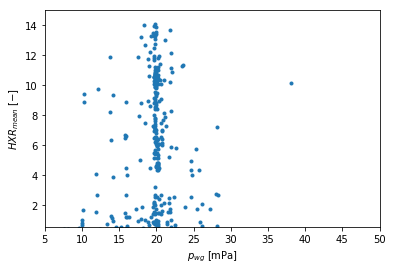

In [4]:
plt.plot(pwg,hxr_mean,'.')
plt.xlim([5,50])
plt.ylim([0.5,15])
plt.xlabel(r'$p_{wg} \ [\mathrm{mPa}]$')
plt.ylabel(r'$HXR_{mean} \ [-]$')

**Výběr dat**

* následně vybere pouze výboje s námi pořadovanými parametry

In [5]:
index10 = (ucd == list_ucd[8])
index21 = pwg > 0
index22 = pwg < 50
index20 = index21 * index22
index31 = hxr_mean > 0.05
index32 = hxr_mean < 1
index30 = index31 * index32
index1 = index10 * index20 * index30
shots1 = shot[index1]
ucd1 = ucd[index1]
ubt1 = ubt[index1]
ubreak1 = ubreak[index1]
umean1 = umean[index1]
pwg1 = pwg[index1]
hxr_mean1 = hxr_mean[index1]

In [6]:
print(sum(index1))
print(list_ucd[4])
print(shots1)
print(hxr_mean1)

35
350.0
[ 21147.  21148.  21149.  23753.  24049.  24513.  24514.  24515.  24516.
  24518.  24519.  24520.  24522.  24654.  24656.  24657.  24706.  24730.
  24731.  24732.  24849.  24857.  24858.  24859.  24860.  24862.  24863.
  24864.  24865.  24866.  24867.  24868.  24869.  24870.  24871.]
[ 0.292325   0.301826   0.306078   0.731416   0.31474    0.702584   0.567032
  0.560412   0.399241   0.244236   0.437561   0.0928289  0.111634   0.390979
  0.42712    0.384651   0.886517   0.503094   0.469574   0.367119   0.556609
  0.326123   0.352464   0.153133   0.260505   0.659178   0.135929   0.170894
  0.0903083  0.192236   0.284666   0.318901   0.234479   0.187619   0.202451 ]


**Ukázka vybraných výbojů**

* zobrazení závislosti $HXR_{mean}$ na číslu výboje

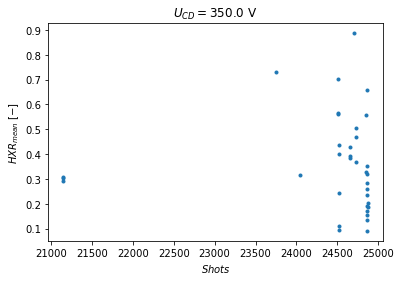

In [7]:
plt.figure()
plt.title(r'$U_{CD} = $' + str(list_ucd[4]) + r' V')
plt.plot(shots1,hxr_mean1,'.')
plt.xlabel(r'$Shots$')
plt.ylabel(r'$HXR_{mean} \ [\mathrm{-}]$')
plt.show()

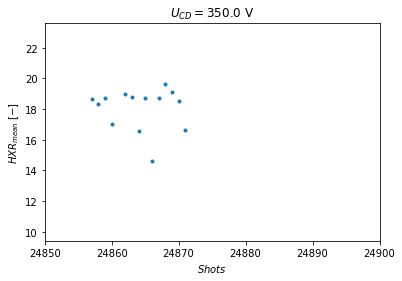

In [8]:
plt.title(r'$U_{CD} = $' + str(list_ucd[4]) + r' V')
plt.plot(shots1,pwg1,'.')
plt.xlabel(r'$Shots$')
plt.ylabel(r'$HXR_{mean} \ [\mathrm{-}]$')
plt.xlim([24850,24900])
plt.show()

**Finální výběr session pro studium**

* vybrány pouze výboje s $U_{CD}  = 400 \ \mathrm{V}$ a tlakem mezi $p_{wg} = 19 - 21 \ \mathrm{mPa} $

**Session 1**

In [9]:
index20 = (ucd == list_ucd[8])
index211 = (pwg > 19)
index212 = (pwg < 21)
index21 = index211 * index212
index221 = (hxr_mean > 1)
index222 = (hxr_mean < 50)
index22 = index221 * index222
index231 = shot > 24360
index232 = shot < 24440
index23 = index231 * index232
index2 = index20 * index21 * index22  * index23
shots2 = shot[index2]
ucd2 = ucd[index2]
ubt2 = ubt[index2]
ubreak2 = ubreak[index2]
umean2 = umean[index2]
pwg2 = pwg[index2]
hxr_mean2 = hxr_mean[index2]

**Session 2**

In [10]:
index30 = (ucd == list_ucd[8])
index311 = (pwg > 19)
index312 = (pwg < 21)
index31 = index311 * index312
index32 = (hxr_mean > 1)
index331 = shot > 23980
index332 = shot < 24000
index33 = index331 * index332
index3 = index30 * index31 * index32 * index33
shots3 = shot[index3]
ucd3 = ucd[index3]
ubt3 = ubt[index3]
ubreak3 = ubreak[index3]
umean3 = umean[index3]
pwg3 = pwg[index3]
hxr_mean3 = hxr_mean[index3]

**Session 3**

In [11]:
index40 = (ucd == list_ucd[8])
index411 = (pwg > 19)
index412 = (pwg < 21)
index41 = index411 * index412
index42 = (hxr_mean > 1)
index431 = shot > 23850
index432 = shot < 23950
index43 = index431 * index432
index4 = index40 * index41 * index42 * index43
shots4 = shot[index4]
ucd4 = ucd[index4]
ubt4 = ubt[index4]
ubreak4 = ubreak[index4]
umean4 = umean[index4]
pwg4 = pwg[index4]
hxr_mean4 = hxr_mean[index4]

**Session 4**

In [12]:
index50 = (ucd == list_ucd[8])
index511 = (pwg > 19)
index512 = (pwg < 21)
index51 = index511 * index512
index52 = (hxr_mean > 1)
index531 = shot > 23750
index532 = shot < 23850
index53 = index531 * index532
index5 = index50 * index51 * index52 * index53
shots5 = shot[index5]
ucd5 = ucd[index5]
ubt5 = ubt[index5]
ubreak5 = ubreak[index5]
umean5 = umean[index5]
pwg5 = pwg[index5]
hxr_mean5 = hxr_mean[index5]

**Definice funkcí pro fit**

In [13]:
def fit_func(x,a,b):
    return a*x + b

popt2,pcov2 = curve_fit(fit_func,np.arange(len(hxr_mean2)),hxr_mean2)
popt3,pcov3 = curve_fit(fit_func,np.arange(len(hxr_mean3)),hxr_mean3)
popt4,pcov4 = curve_fit(fit_func,np.arange(len(hxr_mean4)),hxr_mean4)
popt5,pcov5 = curve_fit(fit_func,np.arange(len(hxr_mean5)),hxr_mean5)

**Závislost $HXR_{mean}$ na $p_{wg}$ pro studované session**

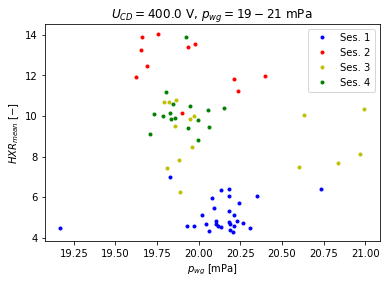

In [14]:
plt.title(r'$U_{CD} = $' + str(list_ucd[8]) + r' V, $p_{wg} = 19 - 21 \ \mathrm{mPa}$' )
plt.plot(pwg2,hxr_mean2,'.b',label='Ses. 1')
plt.plot(pwg3,hxr_mean3,'.r',label='Ses. 2')
plt.plot(pwg4,hxr_mean4,'.y',label='Ses. 3')
plt.plot(pwg5,hxr_mean5,'.g',label='Ses. 4')
plt.xlabel(r'$p_{wg} \ [\mathrm{mPa}]$')
plt.ylabel(r'$HXR_{mean} \ [\mathrm{-}]$')
plt.legend()
plt.show()

**Závislost $HXR_{mean}$ na pořadí výboje v session**

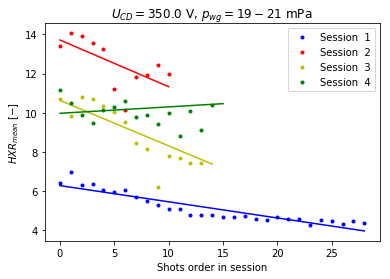

In [19]:
plt.title(r'$U_{CD} = $' + str(list_ucd[4]) + r' V, $p_{wg} = 19 - 21 \ \mathrm{mPa}$' )
plt.plot(hxr_mean2,'.b',label='Session  1')
plt.plot(fit_func(np.arange(len(hxr_mean2)),*popt2),'b')#,label='Fit - Ses. 1')
plt.plot(hxr_mean3,'.r',label='Session  2')
plt.plot(fit_func(np.arange(len(hxr_mean3)),*popt3),'r')#,label='Fit - Ses. 2')
plt.plot(hxr_mean4[:-1],'.y',label='Session  3')
plt.plot(fit_func(np.arange(len(hxr_mean4)),*popt4),'y')#,label='Fit - Ses. 3')
plt.plot(hxr_mean5[:-1],'.g',label='Session  4')
plt.plot(fit_func(np.arange(len(hxr_mean5)),*popt5),'g')#,label='Fit - Ses. 4')
plt.xlabel(r'Shots order in session')
plt.ylabel(r'$HXR_{mean} \ [\mathrm{-}]$')
plt.legend()
plt.show()

In [20]:
popt2,pcov2 = curve_fit(fit_func,np.arange(len(umean2)),umean2)
popt3,pcov3 = curve_fit(fit_func,np.arange(len(umean3)),umean3)
popt4,pcov4 = curve_fit(fit_func,np.arange(len(umean4)),umean4)
popt5,pcov5 = curve_fit(fit_func,np.arange(len(umean5)),umean5)

**Závislost $U_{mean}$ na pořadí výboje v session**

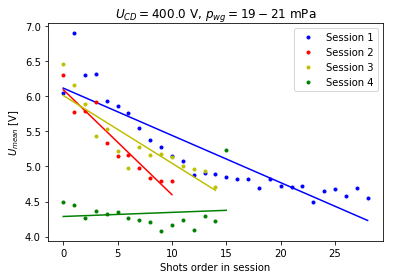

In [24]:
plt.title(r'$U_{CD} = $' + str(list_ucd[8]) + r' V, $p_{wg} = 19 - 21 \ \mathrm{mPa}$' )
plt.plot(umean2,'.b',label='Session 1')
plt.plot(fit_func(np.arange(len(umean2)),*popt2),'b')#,label='Fit - Ses. 1')
plt.plot(umean3,'.r',label='Session 2')
plt.plot(fit_func(np.arange(len(umean3)),*popt3),'r')#,label='Fit - Ses. 2')
plt.plot(umean4,'.y',label='Session 3')
plt.plot(fit_func(np.arange(len(umean4)),*popt4),'y')#,label='Fit - Ses. 3')
plt.plot(umean5,'.g',label='Session 4')
plt.plot(fit_func(np.arange(len(umean5)),*popt5),'g')#,label='Fit - Ses. 4')
plt.xlabel(r'Shots order in session')
plt.ylabel(r'$U_{mean} \ [\mathrm{V}]$')
plt.legend()
plt.show()

In [36]:
popt2,pcov2 = curve_fit(fit_func,np.arange(len(ubreak2)),ubreak2)
popt3,pcov3 = curve_fit(fit_func,np.arange(len(ubreak3)),ubreak3)
popt4,pcov4 = curve_fit(fit_func,np.arange(len(ubreak4)),ubreak4)
popt5,pcov5 = curve_fit(fit_func,np.arange(len(ubreak5)),ubreak5)

**Závislost $U_{break}$ na pořadí výboje v session**

In [ ]:
plt.title(r'$U_{CD} = $' + str(list_ucd[8]) + r' V, $p_{wg} = 19 - 21 \ \mathrm{mPa}$' )
plt.plot(ubreak2,'.b',label='Ses. 1')
plt.plot(fit_func(np.arange(len(ubreak2)),*popt2),'b',label='Fit - Ses. 1')
plt.plot(ubreak3,'.r',label='Ses. 2')
plt.plot(fit_func(np.arange(len(ubreak3)),*popt3),'r',label='Fit - Ses. 2')
plt.plot(ubreak4,'.y',label='Ses. 3')
plt.plot(fit_func(np.arange(len(ubreak4)),*popt4),'y',label='Fit - Ses. 3')
plt.plot(ubreak5,'.g',label='Ses. 4')
plt.plot(fit_func(np.arange(len(ubreak5)),*popt5),'g',label='Fit - Ses. 4')
plt.xlabel(r'Posloupnost výbojů')
plt.ylabel(r'$U_{break} \ [\mathrm{V}]$')
plt.legend()
plt.show()

**Závislost $HXR_{mean}$ na $U_{break}$ pro studované session**

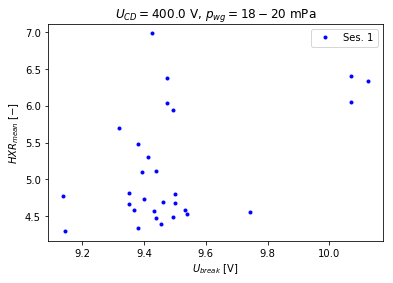

In [38]:
plt.title(r'$U_{CD} = $' + str(list_ucd[8]) + r' V, $p_{wg} = 18 - 20 \ \mathrm{mPa}$' )
plt.plot(ubreak2,hxr_mean2,'.b',label='Ses. 1')
plt.plot(ubreak3,hxr_mean3,'.r',label='Ses. 2')
plt.plot(ubreak4,hxr_mean4,'.y',label='Ses. 3')
plt.plot(ubreak5,hxr_mean5,'.g',label='Ses. 4')
plt.xlabel(r'$U_{break} \ [\mathrm{V}]$')
plt.ylabel(r'$HXR_{mean} \ [\mathrm{-}]$')
plt.legend()
plt.show()

**Závislost $HXR_{mean}$ na $U_{mean}$**

In [40]:
popt2,pcov2 = curve_fit(fit_func,umean2,hxr_mean2)
popt3,pcov3 = curve_fit(fit_func,umean3,hxr_mean3)
popt4,pcov4 = curve_fit(fit_func,umean4,hxr_mean4)
popt5,pcov5 = curve_fit(fit_func,umean5,hxr_mean5)

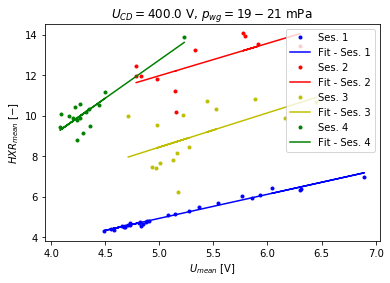

In [41]:
plt.title(r'$U_{CD} = $' + str(list_ucd[8]) + r' V, $p_{wg} = 19 - 21 \ \mathrm{mPa}$' )
plt.plot(umean2,hxr_mean2,'.b',label='Ses. 1')
plt.plot(umean2,fit_func(umean2,*popt2),'b',label='Fit - Ses. 1')
plt.plot(umean3,hxr_mean3,'.r',label='Ses. 2')
plt.plot(umean3,fit_func(umean3,*popt3),'r',label='Fit - Ses. 2')
plt.plot(umean4,hxr_mean4,'.y',label='Ses. 3')
plt.plot(umean4,fit_func(umean4,*popt4),'y',label='Fit - Ses. 3')
plt.plot(umean5,hxr_mean5,'.g',label='Ses. 4')
plt.plot(umean5,fit_func(umean5,*popt5),'g',label='Fit - Ses. 4')
plt.xlabel(r'$U_{mean} \ [\mathrm{V}]$')
plt.ylabel(r'$HXR_{mean} \ [\mathrm{-}]$')
plt.legend()
plt.show()


**Možnost dalšího datamingu **
* k dalšímu bádání může být použit ještě pokračování tohoto skriptu
* ale další částu nebyli využiti k předmětu PRPL, tak jsou ponechány bez komentáře

In [4]:
shots_new = np.arange(24000,25000)
shots_list_new = golmin.find_shots(shots_new)


In [5]:
len(shots_list_new)

382

In [2]:
import urllib.request as urllib 
import scipy  as sp

def get_int_hxr(shot):
    url_start = 'http://golem.fjfi.cvut.cz/utils/data/'+ str(shot) +'/plasma_start'    
    url_end = 'http://golem.fjfi.cvut.cz/utils/data/'+ str(shot) +'/plasma_end'
    url_hxr = 'http://golem.fjfi.cvut.cz/utils/data/'+ str(shot) +'/hxr.txt'
    file_start = urllib.urlopen(url_start).read()
    file_end = urllib.urlopen(url_end).read()
    file_hxr = urllib.urlopen(url_hxr).read()
    data_hxr = np.fromstring(file_hxr,dtype=np.float64,sep=' ')
    time = data_hxr[::2]
    data = data_hxr[1::2]
    time = time[(np.where(time>float(file_start))) and (np.where(time < float(file_end)))]
    data = data[(np.where(time>float(file_start))) and (np.where(time < float(file_end)))]
    int_hxr = sp.integrate.cumtrapz(time,data,initial=0)
    value_int = np.float64(np.amax(int_hxr))
    return value_int/(float(file_end)-float(file_start))


def get_data_int(shot_list):
    n = len(shot_list)
    num_params = 7
    data = np.zeros((n,num_params))
    for i in range(0,n):
        data[i,0] = shot_list[i]
        try: 
            data[i,1] = get_ucd(shot_list[i])
        except:
            data[i,1] = 0
            print('Something goes wrong with shot np. ' + str(shot_list[i]))
        
        try:
            data[i,2] = get_ubt(shot_list[i])
        except:
            data[i,2] = 0
            print('Something goes wrong with shot np. ' + str(shot_list[i]))
    
        try:
            data[i,3] = get_uloop_breakdown(shot_list[i])
        except:
            data[i,3] = 0
            print('Something goes wrong with shot np. ' + str(shot_list[i]))
        
        try:
            data[i,4] = get_uloop_mean(shot_list[i])
        except:
            data[i,4] = 0
            print('Something goes wrong with shot np. ' + str(shot_list[i]))
        
        try:
            data[i,5] = get_preassure_gas(shot_list[i])
        except:
            data[i,5] = 0
            print('Something goes wrong with shot np. ' + str(shot_list[i]))
            
        try:
             data[i,6] = get_int_hxr(shot_list[i])
        except:
            data[i,6] = 0
            print('Something goes wrong with shot np. ' + str(shot_list[i]))
                     
    return  data

def get_ucd(shot):
    url_ucd = 'http://golem.fjfi.cvut.cz/utils/data/' + str(shot) + '/ucd'
    file_ucd = urllib.urlopen(url_ucd).read()    
    ucd = float(file_ucd)
    return ucd

def get_ubt(shot):
    url_ub = 'http://golem.fjfi.cvut.cz/utils/data/' + str(shot) + '/ub'
    file_ub = urllib.urlopen(url_ub).read()    
    ub = float(file_ub)
    return ub

def get_uloop_breakdown(shot):
    url_voltage = 'http://golem.fjfi.cvut.cz/utils/data/'+ str(shot) +'/breakdown_voltage'
    file_voltage = urllib.urlopen(url_voltage).read()
    mean_voltage = float(file_voltage)
    return mean_voltage  
    
def get_uloop_mean(shot):
    url_voltage = 'http://golem.fjfi.cvut.cz/utils/data/'+ str(shot) +'/loop_voltage_mean'
    file_voltage = urllib.urlopen(url_voltage).read()
    mean_voltage = float(file_voltage)
    return mean_voltage

def get_preassure_gas(shot):
    url_press = 'http://golem.fjfi.cvut.cz/utils/data/'+ str(shot) +'/pressure'
    file_press = urllib.urlopen(url_press).read()
    press = float(file_press)
    return press

In [6]:
data_new = get_data_int(shots_list_new)

Something goes wrong with shot np. 24411
Something goes wrong with shot np. 24412
Something goes wrong with shot np. 24413
Something goes wrong with shot np. 24414
Something goes wrong with shot np. 24415
Something goes wrong with shot np. 24416
Something goes wrong with shot np. 24417
Something goes wrong with shot np. 24418
Something goes wrong with shot np. 24419
Something goes wrong with shot np. 24420
Something goes wrong with shot np. 24421
Something goes wrong with shot np. 24422
Something goes wrong with shot np. 24423
Something goes wrong with shot np. 24424
Something goes wrong with shot np. 24425
Something goes wrong with shot np. 24426


In [9]:
list_ucd

array([   0.,   50.,  250.,  300.,  350.,  360.,  400.,  444.,  450.,
        500.,  550.,  600.,  650.,  700.])

In [8]:
list_ucd = np.unique(data_new[:,1])
list_ubt = np.unique(data_new[:,2])
shot = data_new[:,0]
ucd = data_new[:,1]
ubt = data_new[:,2]
ubreak = data_new[:,3]
umean = data_new[:,4]
pwg = data_new[:,5]
hxr_mean = data_new[:,6]

In [133]:
index60 = (ucd == list_ucd[6])
index611 = (pwg > 19)
index612 = (pwg < 21)
index61 = index611 * index612
index62 = (hxr_mean > 1)
index631 = shot > 24370
index632 = shot < 24500
index63 = index631 * index632
index6 = index60 * index61 * index62 * index63
shots6 = shot[index6]
ucd6 = ucd[index6]
ubt6 = ubt[index6]
ubreak6 = ubreak[index6]
umean6 = umean[index6]
pwg6 = pwg[index6]
hxr_mean6 = hxr_mean[index6]

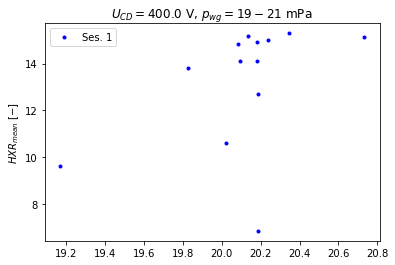

In [134]:
plt.figure()
plt.title(r'$U_{CD} = $' + str(list_ucd[6]) + r' V, $p_{wg} = 19 - 21 \ \mathrm{mPa}$' )
plt.plot(pwg6,hxr_mean6,'.b',label='Ses. 1')
#plt.plot(pwg3,hxr_mean3,'.r',label='Ses. 2')
#plt.plot(pwg4,hxr_mean4,'.y',label='Ses. 3')
#plt.plot(pwg5,hxr_mean5,'.g',label='Ses. 4')
#plt.xlabel(r'$p_{wg} \ [\mathrm{mPa}]$')
plt.ylabel(r'$HXR_{mean} \ [\mathrm{-}]$')
plt.legend()
plt.show()

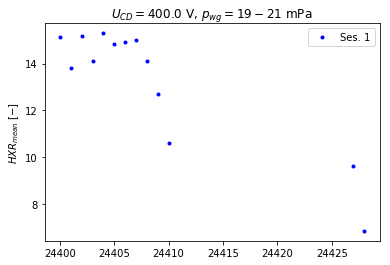

In [135]:
plt.figure()
plt.title(r'$U_{CD} = $' + str(list_ucd[6]) + r' V, $p_{wg} = 19 - 21 \ \mathrm{mPa}$' )
plt.plot(shots6,hxr_mean6,'.b',label='Ses. 1')
#plt.plot(pwg3,hxr_mean3,'.r',label='Ses. 2')
#plt.plot(pwg4,hxr_mean4,'.y',label='Ses. 3')
#plt.plot(pwg5,hxr_mean5,'.g',label='Ses. 4')
#plt.xlabel(r'$p_{wg} \ [\mathrm{mPa}]$')
plt.ylabel(r'$HXR_{mean} \ [\mathrm{-}]$')
plt.legend()
plt.show()

In [ ]:
shots